In [0]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test,y_test) = load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


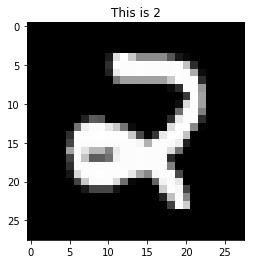

In [9]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.imshow(x_train[c], cmap="gray")

In [10]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,26,222,253,201,139,138,138,138,86,24,9,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,47,252,252,252,253,252,252,252,252,253,194,44,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,34,234,252,252,253,252,252,252,252,253,252,171,13,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,118,160,160,161,160,160,160,202,253,252,252,45,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,44,252,252,150,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,253,161,0,0,0,0,0
